<a href="https://colab.research.google.com/github/rafa-fortes/Estat-stica-_para-_Ci-ncia-_de-_Dados_e_Machine_Learning/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Nearest Neighbor
Também conhecido como K-NN.
Em português: K-vizinho mais próximo.

A lógica de aprendizado desse algoritmo é bem diferente do que a regressão linear simples, vista acima.

Neste caso, o algoritmo considera apenas os vizinhos mais próximos no dataset de treino para fazer a predição.

Além disso, o KNN pode ser usado tanto para regressão quanto para classificação.

Vejamos um exemplo para facilitar o entendimento:

# Bibliotecas 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

#função auxiliar

In [8]:
def KNN_plot(new_X1, new_X2):
    axis_X1 = [1,1.5,2,2.5,1.7,3,4,5,6]
    axis_X2 = [1, 0.8, 1.2,3., 1.4, 4, 4.2, 3.6, 5]
    label__ = [0,0,0,0,0,1,1,1,1]
    dframe = pd.DataFrame(np.c_[axis_X1, axis_X2, label__], columns = ['x1', 'x2', 'y'])
    plt.figure(figsize=[8,6])
    plt.scatter(dframe.loc[dframe.y==0].x1, dframe.loc[dframe.y==0].x2, c = 'red', s = 120, label = 'classe vermelha')
    plt.scatter(dframe.loc[dframe.y==1].x1, dframe.loc[dframe.y==1].x2, c = 'blue', s = 120, label = 'classe azul')
    plt.grid()
    plt.scatter(new_X1, new_X2, s = 200, c = 'gray', label = 'qual classe??')
    plt.legend(fontsize = 15, bbox_to_anchor=[1., 1.])
    plt.show()

# Exemplos:

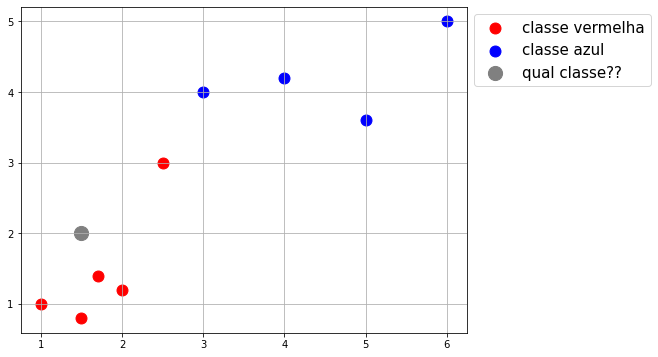

In [9]:
KNN_plot(1.5, 2)

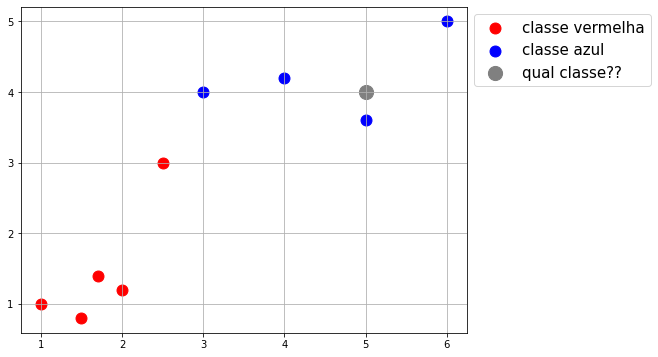

In [10]:
KNN_plot(5, 4)

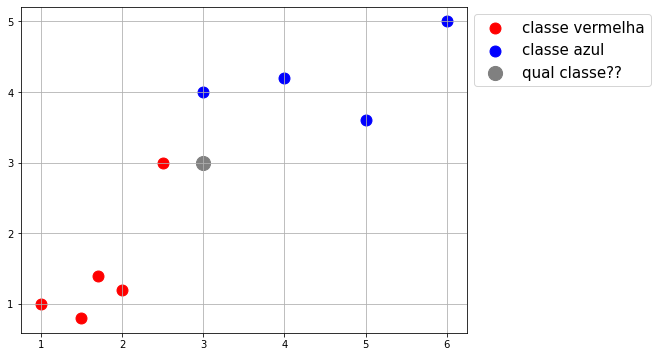

In [11]:
KNN_plot(3, 3)

# K-NN

Primeiramente, fixamos o valor de __K__, a __quantidade de vizinhos__ a ser considerada.

__Classificação:__
A predição é dada pelo ___voto majoritário__ da variável target ___desses vizinhos mais próximos.__



__Regressão:__
A predição é dada pela __média__ da variável target __desses vizinhos mais próximos.__




__Vamos a um exemplo:__

Considere o dataset abaixo, contendo informações de 9 casas. Temos a quantidade de quartos, a área da casa (em metros quadrados) e o preço de venda.

dataset
   qtd_quartos  area  preco
0            1    30  16000
1            1    40  18000
2            1    50  20000
3            2    40  28000
4            2    70  34000
5            2    55  31000
6            3   100  50000
7            3    70  44000
8            4    95  59000



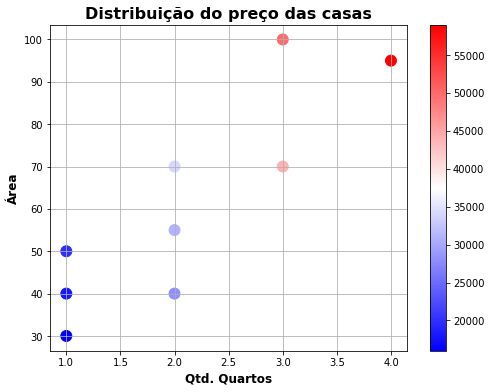

In [12]:
qtd_quartos = [1,1,1,2,2,2,3,3,4]
area = [30, 40, 50, 40, 70, 55, 100, 70, 95]
preco = np.array(qtd_quartos) * 10000 + np.array(area) * 200

dframe = pd.DataFrame(np.c_[qtd_quartos, area, preco], columns= ['qtd_quartos', 'area', 'preco'])
print('dataset')
print(dframe)
print()
plt.figure(figsize= [8,6])
plt.scatter(dframe.qtd_quartos, dframe.area, c = preco, cmap= plt.cm.bwr, s= 120)
plt.colorbar()
plt.grid()
plt.title('Distribuição do preço das casas', fontweight= 'bold', fontsize = 16)
plt.xlabel('Qtd. Quartos', fontweight = 'bold', fontsize = 12)
plt.ylabel('Área', fontweight = 'bold', fontsize = 12);

# __Perguntas__
Quanto custa uma casa com 1 quarto e tem 60 metros quadrados de área?

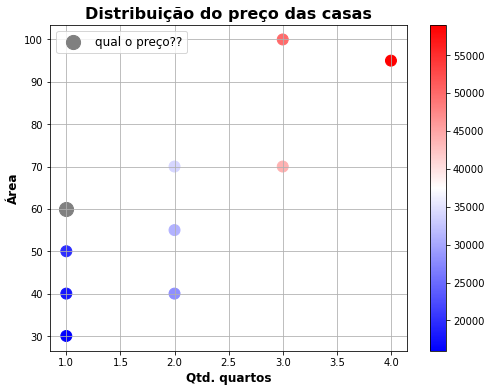

In [13]:
qtd_quarto_novo = 1
area_novo = 60

plt.figure(figsize=[8,6])
plt.scatter(dframe.qtd_quartos, dframe.area, c = preco, cmap = plt.cm.bwr, s = 120)
plt.colorbar()
plt.grid()
plt.title("Distribuição do preço das casas", fontweight = 'bold', fontsize = 16)
plt.xlabel("Qtd. quartos", fontweight = 'bold', fontsize = 12)
plt.ylabel("Área", fontweight = 'bold', fontsize = 12)
plt.scatter(qtd_quarto_novo, area_novo, s = 200, c = 'gray', label = 'qual o preço??')
plt.legend(bbox_to_anchor = [0.4,1], fontsize = 12)
plt.show()

In [16]:
dframe

,qtd_quartos,area,preco
0,1,30,16000
1,1,40,18000
2,1,50,20000
3,2,40,28000
4,2,70,34000
5,2,55,31000
6,3,100,50000
7,3,70,44000
8,4,95,59000


In [25]:
X = dframe[['qtd_quartos', 'area']] #organizando as variáveis preditoras na variável X
y = dframe.preco.values  #organizando as variáveis target na variável y
type(X), X.shape

(pandas.core.frame.DataFrame, (9, 2))

In [27]:
# Instanciando um KNN - considerando 3 vizinhos:


In [28]:
#vms instanciar nosso algoritimo
knn = KNeighborsRegressor(n_neighbors=3)

In [29]:
#vms fitar nosso algoritmo
knn.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [32]:
#criando a casa cujo preço queremos estimar
nova_casa = np.array([[1, 60]])

In [34]:
#vms fazer a predição
knn.predict(nova_casa)


array([28333.33333333])

Portanto, usando o KNN com 3 vizinhos, o valor da casa foi de R$28333,33 reais! E se tivéssemos usado apenas 1 vizinho? e 5 vizinhos?

Vamos rodar um loop for na quantidade de vizinhos, de 1 até 9 e ver como o preço da casa irá variar:

In [40]:
for num_vizinhos in range(1, 10):
    
    knn = KNeighborsRegressor(n_neighbors = num_vizinhos)
    knn.fit(X, y)
    pred__ = knn.predict(nova_casa)[0]
    print('Número de vizinhos:', num_vizinhos, '- preço estimado', pred__)


Número de vizinhos: 1 - preço estimado 31000.0
Número de vizinhos: 2 - preço estimado 25500.0
Número de vizinhos: 3 - preço estimado 28333.333333333332
Número de vizinhos: 4 - preço estimado 32250.0
Número de vizinhos: 5 - preço estimado 29400.0
Número de vizinhos: 6 - preço estimado 29166.666666666668
Número de vizinhos: 7 - preço estimado 27285.714285714286
Número de vizinhos: 8 - preço estimado 31250.0
Número de vizinhos: 9 - preço estimado 33333.333333333336


__Conclusão:__

O __KNN,__ __é bastante dependente dos parâmetros que setamos no algoritmo.__

Esses parâmetros, como são setados antes do modelo ser fitado nos dados, são também chamados de __hiper-parâmetros.__

Cabe ao __cientista de dados__ analisar o problema em __questão e descobrir qual é om melhor parâmetro__ a ser usado neste caso!
